# Analysis, Recommendation and Text Generation for TED talks using NLP
## 1. Pre-Processing

## Importing relevant libraries

In [2]:
import re
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.feature_extraction import text

import warnings
warnings.filterwarnings("ignore")
# style.use('dark_background')
style.use('ggplot')

## Reading the data file from csv

In [3]:
main_df = pd.read_csv('TED-data/ted_main.csv')
trans_df = pd.read_csv('TED-data/transcripts.csv')

In [4]:
for i in range(len(main_df.columns)):
    i+=1

print("Total Columns : ", i)

main_df.columns

Total Columns :  17


Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

### There are 17 feature columns in the main dataset

### About the features:
* __comments__: The Number of comments of the talk
* __description__: A summary of what the talk was about
* __duration__: The Duration of the talk in seconds
* __event__: The Event where the talk took place
* __film_date__: The Date on which the talk was filmed/recorded.
* __languages__: The number of languages in which the TED talk is available.
* __main_speaker__: The main speaker of the talk
* __name__: Includes Title and name of the speaker.
* __num_speaker__: Number of speakers in the talk
* __published_date__: Date when the TED Talk was published
* __ratings__: A Dictionary of various ratings given like Courageous, Inspiring, etc
* __related_talks__: A list of talks recomended to watch next
* __speaker_occupation__: Occupation of the speaker
* __tags__: Different themes related to talk
* __title__: Title of the TED Talk
* __url__: The URL of the TED Talk
* __views__:Number of views on the TED Talk

In [5]:
main_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Checking for missing or null values in dataset

In [6]:
main_df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Only "speaker_occupation" column has missing values in 6 rows. In the general case if the missing values type is numeric we fill it with mean values. If its an object we fill missing values with mode.

In [7]:
main_df['speaker_occupation'] = main_df.speaker_occupation.fillna(main_df.speaker_occupation.mode()[0])

### Converting "film_date" and "published_date" columns into D-M-Y format using datetime library 

In [8]:
main_df['film_datetime'] = pd.to_datetime(main_df.film_date, unit='s')

main_df['film_date'] = main_df['film_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
main_df['published_date'] = main_df['published_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [9]:
main_df.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                     object
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                object
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
film_datetime         datetime64[ns]
dtype: object

In [10]:
# verify that event name matches film_date
main_df[['event', 'film_date']].sample(5)

,event,film_date
2051,TEDWomen 2015,27-05-2015
2275,TED2016,18-02-2016
1108,TEDxRC2,10-11-2011
1223,TEDxPhoenix,10-11-2011
2063,TEDGlobal>London,28-09-2015


### Converting "duration" into hours and storing in new column labelled "duration_hrs"

In [11]:
main_df['duration_hr']=main_df['duration']/(60*60)                  # converted duration to hours by dividing by 3600
main_df['duration_hr']=main_df['duration_hr'].astype(float)         # stored time as hours in float datatype
main_df['duration_hr']=main_df['duration_hr'].round(decimals=2)     # rounded to nearest two decimal places

In [12]:
main_df.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_datetime,duration_hr
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,0.32


### Converting Upper case letters in "description" and "title" to lower case

In [13]:
main_df['description']=main_df['description'].str.lower()
main_df['title']=main_df['title'].str.lower()

In [14]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

### Re-ordering the data frame for better ordering of features according to personal preference

In [15]:
main_df = main_df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration','duration_hr', 'event', 'film_date','film_datetime', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

### Copying Dataframe for EDA

In [16]:
md_copy = main_df.copy()

In [17]:
md_copy.dtypes

name                          object
title                         object
description                   object
main_speaker                  object
speaker_occupation            object
num_speaker                    int64
duration                       int64
duration_hr                  float64
event                         object
film_date                     object
film_datetime         datetime64[ns]
published_date                object
comments                       int64
tags                          object
languages                      int64
ratings                       object
related_talks                 object
url                           object
views                          int64
dtype: object

### Removing HTML tags from the description text

In [18]:
def tag_removal(string):
    result = re.sub('<.*?>','',string)
    return result

md_copy['description']=md_copy['description'].apply(lambda cw : tag_removal(cw))

## 2. Exploratory Data Analysis 

In [19]:
md_copy.head(5)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,duration_hr,event,film_date,film_datetime,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,do schools kill creativity?,sir ken robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,0.32,TED2006,24-02-2006,2006-02-25,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,averting the climate crisis,with the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,0.27,TED2006,24-02-2006,2006-02-25,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,simplicity sells,new york times columnist david pogue takes aim...,David Pogue,Technology columnist,1,1286,0.36,TED2006,23-02-2006,2006-02-24,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,greening the ghetto,"in an emotionally charged talk, macarthur-winn...",Majora Carter,Activist for environmental justice,1,1116,0.31,TED2006,25-02-2006,2006-02-26,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,the best stats you've ever seen,you've never seen data presented like this. wi...,Hans Rosling,Global health expert; data visionary,1,1190,0.33,TED2006,21-02-2006,2006-02-22,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [20]:
def get_top10(feature):
    popular_talks = md_copy[['name','title','description','main_speaker','speaker_occupation','num_speaker','duration','duration_hr','event','film_date','film_datetime', 'published_date','comments','tags','languages','ratings','related_talks','url','views']].sort_values(by=feature,ascending=False).set_index(feature).reset_index().head(10)
    return popular_talks

In [21]:
def get_graph(feature):
    df_top10 = md_copy[['name','title','description','main_speaker','speaker_occupation','num_speaker','duration','duration_hr','event','film_date','film_datetime', 'published_date','comments','tags','languages','ratings','related_talks','url','views']].sort_values(feature, ascending=False).head(10)
    x_labels=df_top10['title'].to_list()
    plt.figure(figsize=(12,8))
    ax=sns.barplot(x='title',y=feature,data=df_top10)
    ax.set_title('TOP 10 TED Talks by '+str(feature).upper(), color='b')
    ax.set_xlabel('TITLES')
    ax.set_ylabel(feature)
    ax.set_xticklabels(x_labels,rotation='vertical')
    
    rects=ax.patches

    
    labels=df_top10[feature].to_list()
    
    for rect,label in zip(rects,labels):
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2,height,label,ha='center',va='bottom')

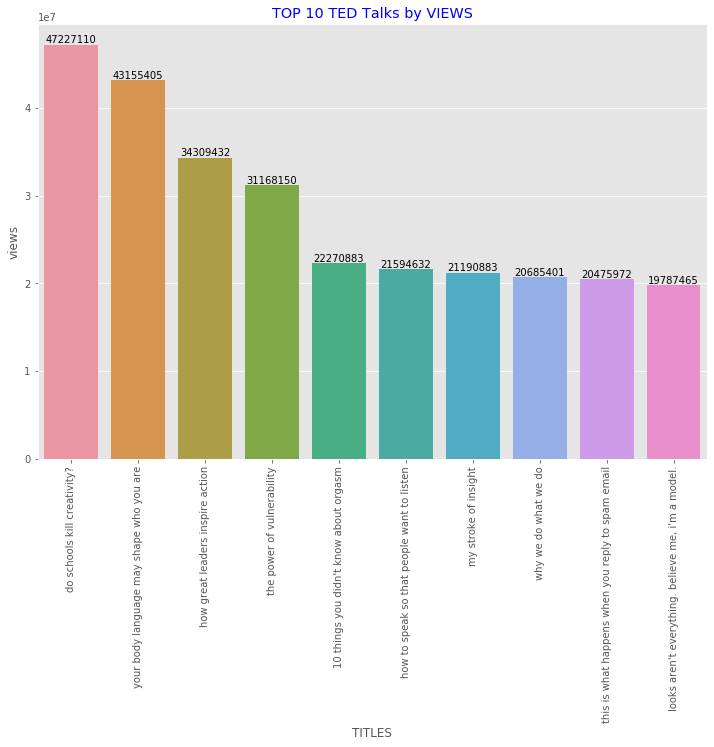

In [22]:
get_graph('views')

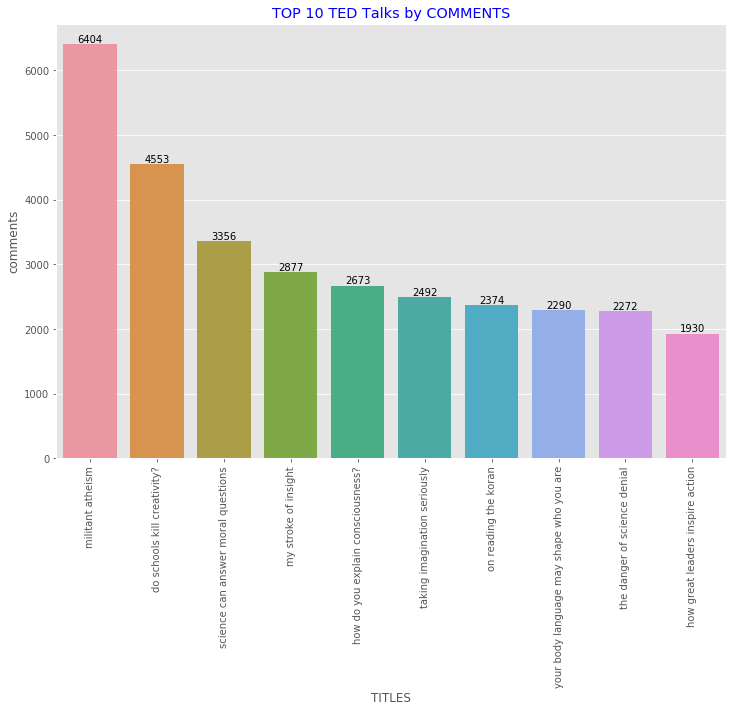

In [23]:
get_graph('comments')

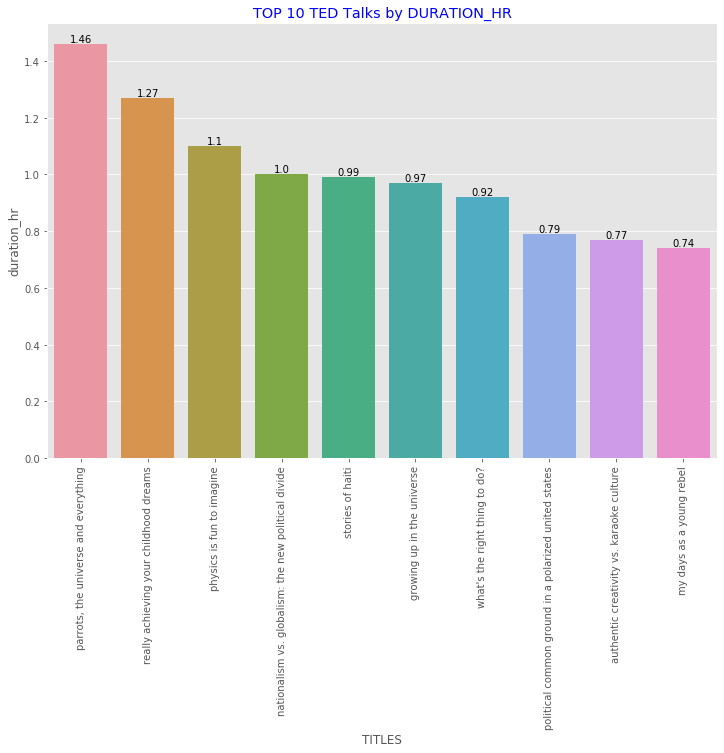

In [24]:
get_graph('duration_hr')

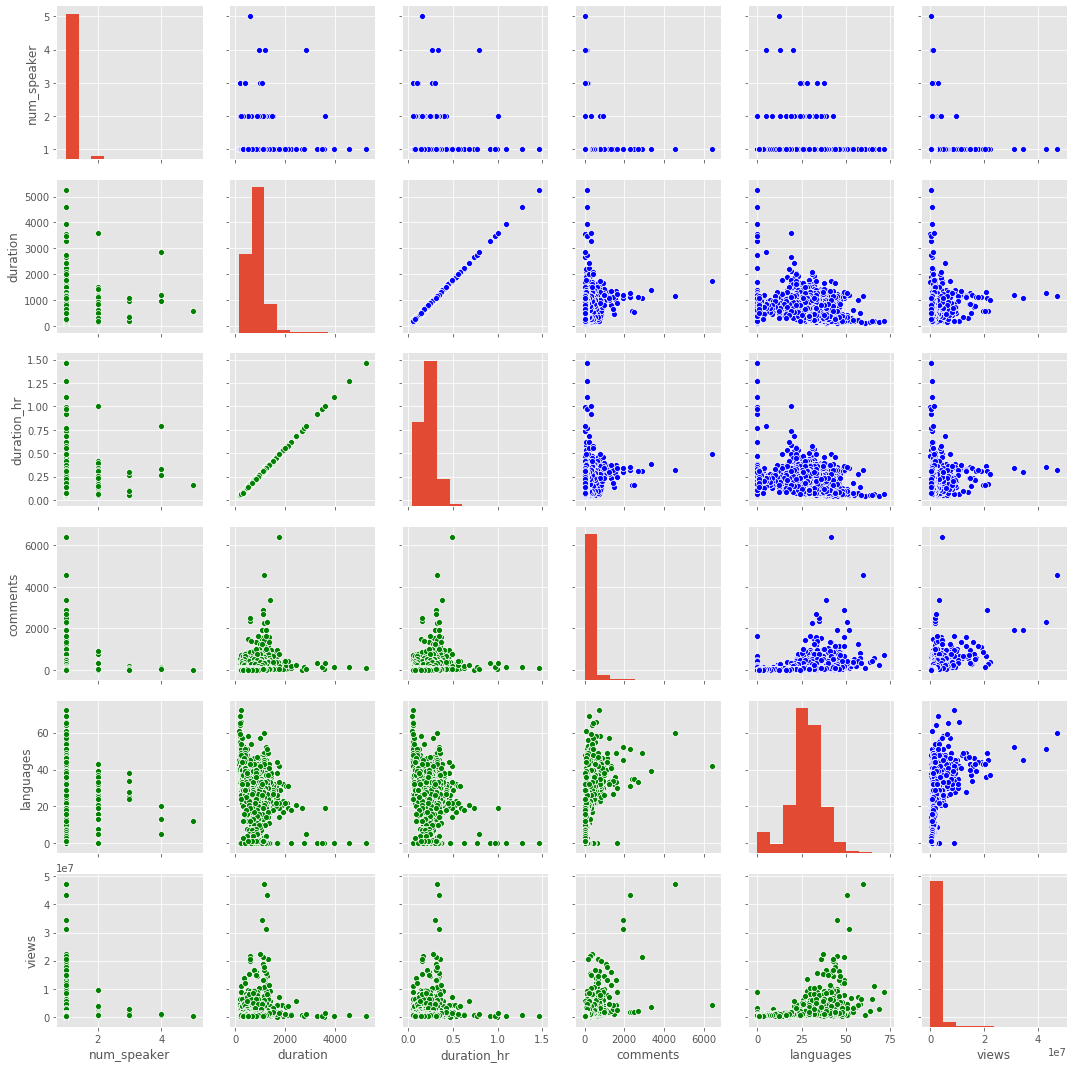

In [25]:
g=sns.pairplot(data=md_copy)
g.map_upper(sns.scatterplot,color='blue')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

### Ratings Column 

In [103]:
# Formatting and Unpacking the 'ratings' feature
md_copy.ratings = md_copy.ratings.apply(ast.literal_eval)
md_copy.ratings[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [104]:
# function to count columns and return count
def co(i):
    counts = 0
    for item in i:
        counts += item["count"]
    return counts

In [105]:
# Add new columns for each rating associated with the row
for i, rate in enumerate(md_copy.ratings):
    maximum = ["", 0]
    for item in rate:
        md_copy.loc[i, item['name'].lower()] = item['count']
        
        #Add a column which shows which rated object has the most value
        if item['count'] > maximum[1]:   
            maximum = [item['name'].lower(), item['count']]
    md_copy.loc[i, 'maximum-rated'] = maximum[0]

In [106]:
# Adding column 'rating-count' to count total number of ratings given for the row
md_copy["rating-count"] = md_copy.ratings.apply(lambda x: co(x))
# showing all columns
pd.set_option('max_columns', None)
md_copy.head(5)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,duration_hr,event,film_date,film_datetime,published_date,comments,tags,languages,ratings,related_talks,url,views,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count
0,Ken Robinson: Do schools kill creativity?,do schools kill creativity?,sir ken robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,0.32,TED2006,24-02-2006,2006-02-25,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,19645.0,4573.0,6073.0,3253.0,387.0,242.0,7346.0,10581.0,300.0,10704.0,4439.0,1174.0,209.0,24924.0,inspiring,93850
1,Al Gore: Averting the climate crisis,averting the climate crisis,with the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,0.27,TED2006,24-02-2006,2006-02-25,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,544.0,58.0,56.0,139.0,113.0,62.0,443.0,132.0,258.0,268.0,116.0,203.0,131.0,413.0,funny,2936
2,David Pogue: Simplicity sells,simplicity sells,new york times columnist david pogue takes aim...,David Pogue,Technology columnist,1,1286,0.36,TED2006,23-02-2006,2006-02-24,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,964.0,60.0,183.0,45.0,78.0,27.0,395.0,166.0,104.0,230.0,54.0,146.0,142.0,230.0,funny,2824
3,Majora Carter: Greening the ghetto,greening the ghetto,"in an emotionally charged talk, macarthur-winn...",Majora Carter,Activist for environmental justice,1,1116,0.31,TED2006,25-02-2006,2006-02-26,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,59.0,291.0,105.0,760.0,53.0,32.0,380.0,132.0,36.0,460.0,230.0,85.0,35.0,1070.0,inspiring,3728
4,Hans Rosling: The best stats you've ever seen,the best stats you've ever seen,you've never seen data presented like this. wi...,Hans Rosling,Global health expert; data visionary,1,1190,0.33,TED2006,21-02-2006,2006-02-22,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,1390.0,942.0,3202.0,318.0,110.0,72.0,5433.0,4606.0,67.0,2542.0,3736.0,248.0,61.0,2893.0,informative,25620


### Related-Talks column

In [107]:
# Formatting and unpacking the related_talks feature
md_copy.related_talks = md_copy.related_talks.apply(ast.literal_eval)
md_copy.related_talks[0]

[{'id': 865,
  'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
  'speaker': 'Ken Robinson',
  'title': 'Bring on the learning revolution!',
  'duration': 1008,
  'slug': 'sir_ken_robinson_bring_on_the_revolution',
  'viewed_count': 7266103},
 {'id': 1738,
  'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg',
  'speaker': 'Ken Robinson',
  'title': "How to escape education's death valley",
  'duration': 1151,
  'slug': 'ken_robinson_how_to_escape_education_s_death_valley',
  'viewed_count': 6657572},
 {'id': 2276,
  'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg',
  'speaker': 'Linda Cliatt-Wayman',
  'title': 'How to fix a broken school? Lead fearlessly, love hard',
  'duration': 1027,
  'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard',
  'viewed_count': 1617101},
 {'id': 892,
  'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb58

In [108]:
# count the number of talks each year using value_counts()
md_copy.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2004     33
2003     33
2002     27
1998      6
2001      5
1983      1
1972      1
1990      1
1994      1
1984      1
1991      1
Name: film_datetime, dtype: int64